## Task 1 : Prediction Using Supervised ML

> Predicting the percentage of marks of an student based on the number of study hours using Supervised Machine Learning model Linear Regression.







In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [69]:
# Importing Data 
data = 'http://bit.ly/w-data'
Data= pd.read_csv(data)
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [70]:
# Data Size
Data.shape

(25, 2)

In [71]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [72]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [73]:
#checking for missing values
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

we can see there are no missing values and we are good to do perform our prediction task.

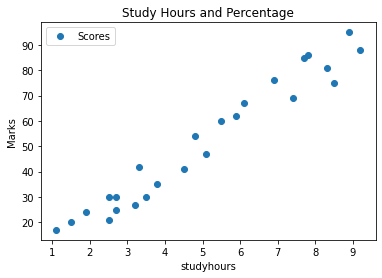

In [74]:
# plotting the given data
Data.plot(x='Hours', y='Scores', style='o')
plt.title('Study Hours and Percentage')
plt.xlabel('studyhours')
plt.ylabel('Marks')
plt.show()

From observing the plot it is obvious that the study hours are directly proportional to the scores of the student.

**Data Preparation**
> Preparing target and independent variables for prediction.



In [75]:
X = Data.iloc[:, :-1].values  
y = Data.iloc[:, 1].values 

splitting the data for training and testing progress.

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Linear Regression Algorithm:**

Training our algorithm with our data

In [77]:
from sklearn.linear_model import LinearRegression   
lr= LinearRegression()
lr.fit(X_train, y_train)

print('Training Done')

Training Done


In [78]:
# coefficient and intercept of the line
print(lr.coef_)
print(lr.intercept_)

[9.91065648]
2.018160041434662


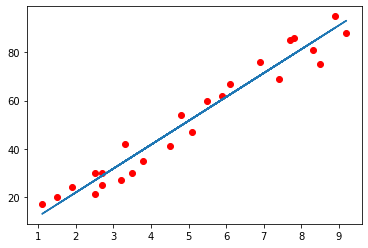

In [92]:
# plotting the test data
eq= lr.coef_*X+lr.intercept_
plt.scatter(X, y, color='r')
plt.plot(X, eq)
plt.show()

now that our algorithm is trained.

**Prediction**

In [80]:
#predicting the scores
print(X_test) 
y_pred = lr.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [81]:
prediction= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
prediction.head() 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [91]:
#our prediction
print('Hours:9.25','Score:',lr.predict(np.array(9.25).reshape(-1,1)))
print('Hours:8','Score:',lr.predict(np.array(8).reshape(-1,1)))

Hours:9.25 Score: [93.69173249]
Hours:8 Score: [81.30341189]


**Model Evaluation**

Model ealuation is an important step in the testing the accuracy of the model against the original data.

In [83]:
from sklearn import metrics  
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
